在该notebook中，我们探究如何去除大周期（如供给侧改革的引发的行业景气度改变），以及去除大周期后如何对RB建模。

In [1]:
year_range = [2011, 2021]  # 研究的年份区间

%run 库.ipynb  # 包含一切的包

# 使用HP或L1滤波

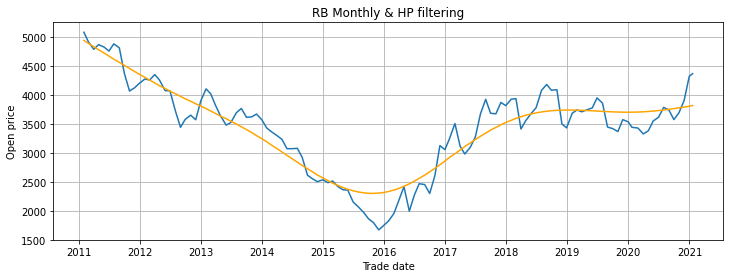

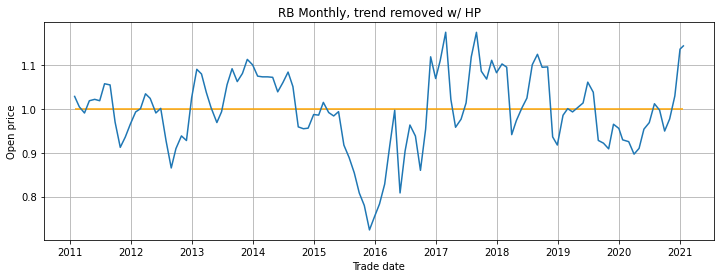

In [2]:
# RB月度环比，HP滤波

plt.figure(figsize=(12, 4))
plt.plot(RB.monthly.trade_date, RB.monthly.Open_filter.values)
plt.plot(RB.monthly.trade_date, HP(RB.monthly.Open_filter.values, lamb = 5000), 
         color = 'orange')
plt.title(RB.code + ' Monthly & HP filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(RB.monthly.trade_date, RB.monthly.Open_filter.values/HP(RB.monthly.Open_filter.values, lamb = 5000))
plt.hlines(y = 1, 
           xmin = RB.monthly.trade_date.values[0], 
           xmax = RB.monthly.trade_date.values[-1], 
           colors = 'orange')
plt.title(RB.code + ' Monthly, trend removed w/ HP')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

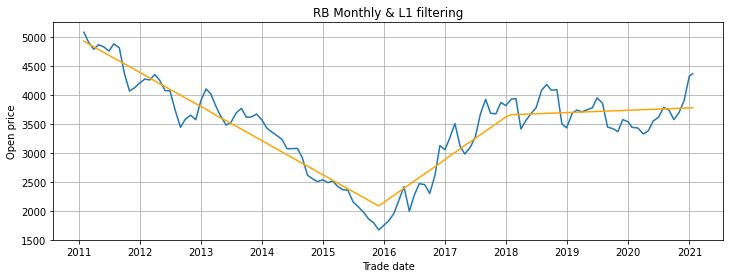

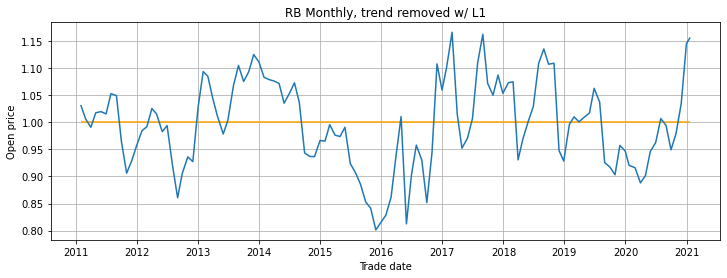

In [3]:
# RB月度环比，L1滤波

plt.figure(figsize=(12, 4))
plt.plot(RB.monthly.trade_date, RB.monthly.Open_filter.values)
plt.plot(RB.monthly.trade_date, L1(RB.monthly.Open_filter.values, lamb = 20000), 
         color = 'orange')
plt.title(RB.code + ' Monthly & L1 filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(RB.monthly.trade_date, RB.monthly.Open_filter.values/L1(RB.monthly.Open_filter.values, lamb = 20000))
plt.hlines(y = 1, 
           xmin = RB.monthly.trade_date.values[0], 
           xmax = RB.monthly.trade_date.values[-1], 
           colors = 'orange')
plt.title(RB.code + ' Monthly, trend removed w/ L1')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

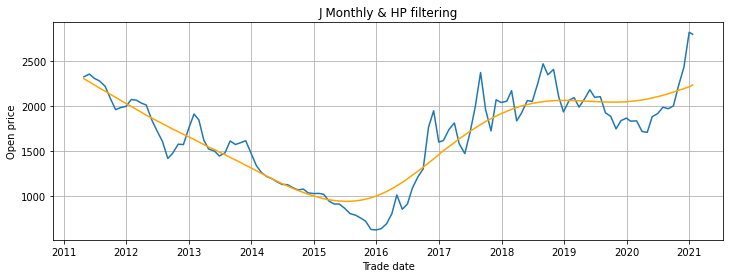

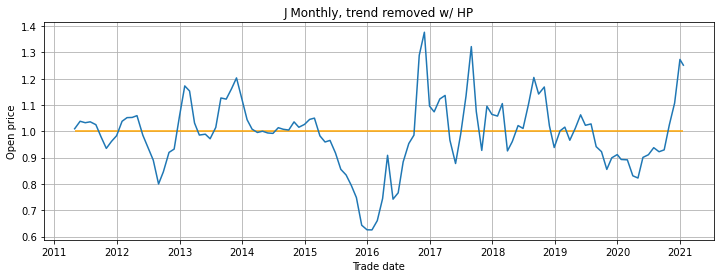

In [4]:
# J月度环比，HP滤波

plt.figure(figsize=(12, 4))
plt.plot(J.monthly.trade_date, J.monthly.Open_filter.values)
plt.plot(J.monthly.trade_date, HP(J.monthly.Open_filter.values, lamb = 5000), 
         color = 'orange')
plt.title(J.code + ' Monthly & HP filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(J.monthly.trade_date, J.monthly.Open_filter.values/HP(J.monthly.Open_filter.values, lamb = 5000))
plt.hlines(y = 1, 
           xmin = J.monthly.trade_date.values[0], 
           xmax = J.monthly.trade_date.values[-1], 
           colors = 'orange')
plt.title(J.code + ' Monthly, trend removed w/ HP')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


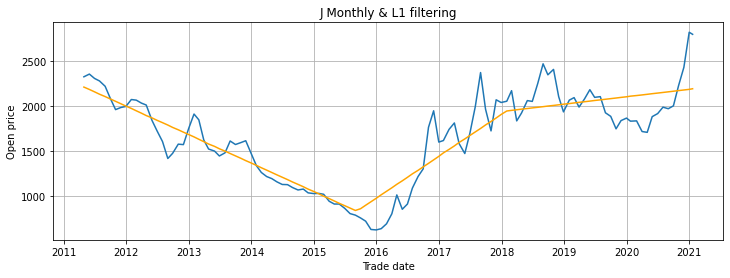

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


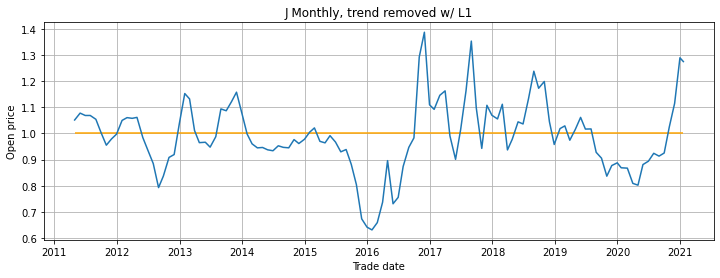

In [5]:
# J月度环比，L1滤波

plt.figure(figsize=(12, 4))
plt.plot(J.monthly.trade_date, J.monthly.Open_filter.values)
plt.plot(J.monthly.trade_date, L1(J.monthly.Open_filter.values, lamb = 20000), 
         color = 'orange')
plt.title(J.code + ' Monthly & L1 filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(J.monthly.trade_date, J.monthly.Open_filter.values/L1(J.monthly.Open_filter.values, lamb = 20000))
plt.hlines(y = 1, 
           xmin = J.monthly.trade_date.values[0], 
           xmax = J.monthly.trade_date.values[-1], 
           colors = 'orange')
plt.title(J.code + ' Monthly, trend removed w/ L1')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

# 片段式滤波与拼接

我们尝试将2011.1至2021.1的数据分为三部分：
- 2011.1 - 2016.1（5年）：产能过剩，线性下行大趋势
- 2016.1 - 2018.1（2年）：供给侧改革，趋势反转，线性上行大趋势
- 2018.1 - 2021.1（3年）：重归平稳，无上行或下行大趋势

具体落实，我们先用线性回归拟合前5年的数据，然后用强制零斜率线性回归拟合后3年数据，最后将中间两年线性连接。

In [6]:
def section_filtering(pdSeries):
    trend = pd.Series(np.repeat(np.nan, pdSeries.shape[0]))
    trend[:pdSeries[pdSeries.year <= 2015].shape[0]] = \
        L1(pdSeries[pdSeries.year <= 2015].Open_filter.values, lamb = 100000)
    trend[-pdSeries[pdSeries.year >= 2018].shape[0]:] = \
        np.mean(pdSeries[pdSeries.year >= 2018].Open_filter.values)
    return trend.interpolate()

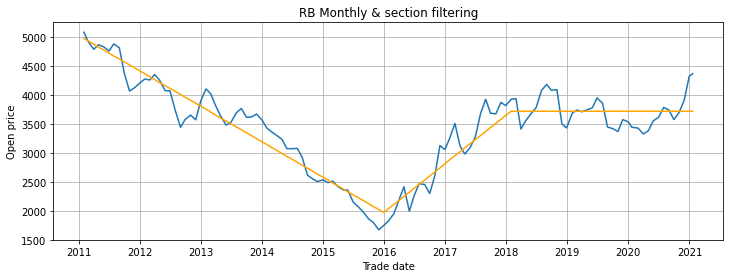

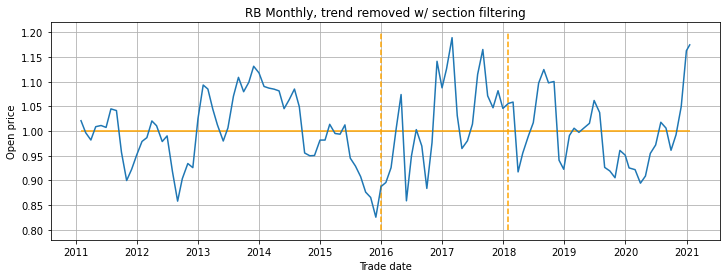

In [7]:
# RB月度环比，片段式滤波与拼接

plt.figure(figsize=(12, 4))
plt.plot(RB.monthly.trade_date, RB.monthly.Open_filter.values)
plt.plot(RB.monthly.trade_date, section_filtering(RB.monthly), color = 'orange')
plt.title(RB.code + ' Monthly & section filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(RB.monthly.trade_date, RB.monthly.Open_filter.values/section_filtering(RB.monthly))
plt.hlines(y = 1, 
           xmin = RB.monthly.trade_date.values[0], 
           xmax = RB.monthly.trade_date.values[-1], 
           colors = 'orange')
plt.vlines(x = RB.monthly[RB.monthly.year <= 2015].trade_date.iloc[-1], 
           ymin = 0.8, 
           ymax = 1.2, 
           linestyles = 'dashed', 
           colors = 'orange')
plt.vlines(x = RB.monthly[RB.monthly.year >= 2018].trade_date.iloc[0], 
           ymin = 0.8, 
           ymax = 1.2, 
           linestyles = 'dashed', 
           colors = 'orange')
plt.title(RB.code + ' Monthly, trend removed w/ section filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


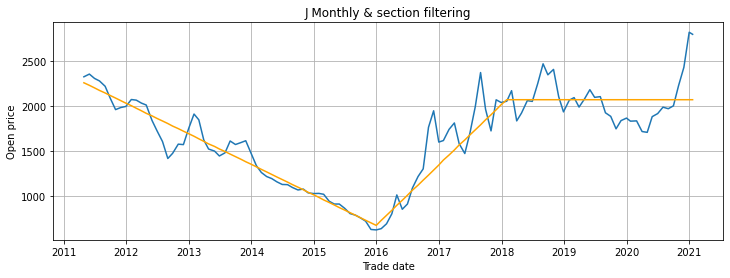

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cvxpy/problems/problem.py:1268: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


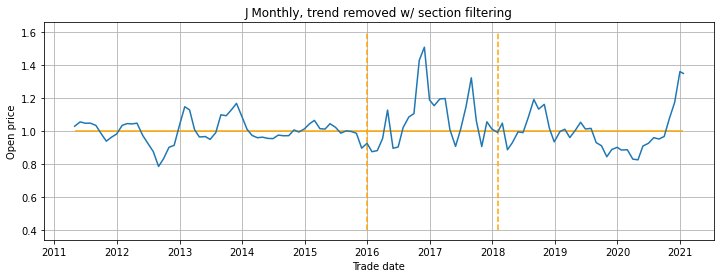

In [8]:
# J月度环比，片段式滤波与拼接


plt.figure(figsize=(12, 4))
plt.plot(J.monthly.trade_date, J.monthly.Open_filter.values)
plt.plot(J.monthly.trade_date, section_filtering(J.monthly), color = 'orange')
plt.title(J.code + ' Monthly & section filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(J.monthly.trade_date, J.monthly.Open_filter.values/section_filtering(J.monthly))
plt.hlines(y = 1, 
           xmin = J.monthly.trade_date.values[0], 
           xmax = J.monthly.trade_date.values[-1], 
           colors = 'orange')
plt.vlines(x = J.monthly[J.monthly.year <= 2015].trade_date.iloc[-1], 
           ymin = 0.4, 
           ymax = 1.6, 
           linestyles = 'dashed', 
           colors = 'orange')
plt.vlines(x = J.monthly[J.monthly.year >= 2018].trade_date.iloc[0], 
           ymin = 0.4, 
           ymax = 1.6, 
           linestyles = 'dashed', 
           colors = 'orange')
plt.title(J.code + ' Monthly, trend removed w/ section filtering')
plt.xlabel('Trade date')
plt.ylabel('Open price')
plt.grid()
plt.show()